(Reelle datasett)=
### Reelle datasett

Som jegere i en data-jungel har vi lært å jakte, slakte og partere data-byttet vårt -- men det viser seg at vi egentlig ikke hadde trengt å jakte lengre, fordi det finnes data-biff ferdig partert i butikken -- i form av fint formaterte `.csv`- og `.json`-filer.

Med `pandas` er det å åpne og analysere datafiler en lek, men før vi ser på datafilene, må vi bli kjent med `DataFrame`-objekter.

#### Dataframes

Den viktigste datatypen fra `pandas` er `DataFrame`.

En dataframe er en ordbok hvor keys er navn for kolonner, og values er data i hver kolonne.

In [1]:
import pandas as pd

data = {
    'Navn': ['Aelar', 'Thalia', 'Gorath', 'Elara', 'Borin'],
    'Class': ['Ranger', 'Wizard', 'Barbarian', 'Rogue', 'Cleric'],
    'Alder': [120, 35, 28, 25, 150],
    'Rase': ['Elf', 'Human', 'Half-Orc', 'Halfling', 'Dwarf'],
    'Level': [5, 7, 6, 4, 8]
}

df = pd.DataFrame(data)

print(df)

     Navn      Class  Alder      Rase  Level
0   Aelar     Ranger    120       Elf      5
1  Thalia     Wizard     35     Human      7
2  Gorath  Barbarian     28  Half-Orc      6
3   Elara      Rogue     25  Halfling      4
4   Borin     Cleric    150     Dwarf      8


##### Søyler

Man kan hente all data fra en søyle ved å bruke søylens navn.

In [4]:
print(df["Navn"])
print()
print(list(df["Navn"]))

0     Aelar
1    Thalia
2    Gorath
3     Elara
4     Borin
Name: Navn, dtype: object

['Aelar', 'Thalia', 'Gorath', 'Elara', 'Borin']


##### Rader

Man kan hente en spesifikk rad ved å bruke `iloc()`.

In [16]:
print(df.iloc[4])

Navn      Borin
Class    Cleric
Alder       150
Rase      Dwarf
Level         8
Name: 4, dtype: object


##### Filtrering

Man kan også enkelt filtrere resultater.

In [19]:
print(df[df["Level"] >= 6]) # Henter ut alle som har level større enn eller likt 6

     Navn      Class  Alder      Rase  Level
1  Thalia     Wizard     35     Human      7
2  Gorath  Barbarian     28  Half-Orc      6
4   Borin     Cleric    150     Dwarf      8


##### Gjennomsnitt og sum

Gjennomsnitt og sum finner man også lett.

In [24]:
print(f"Gjennomsnittlig alder: {df['Alder'].mean()} år")
print(f"Sum av hvert level: {df['Level'].sum()}")

Gjennomsnittlig alder: 71.6 år
Sum av hvert level: 30


##### Sortering 

Man kan sortere en DataFrame etter verdier.

In [27]:
print(df.sort_values(by="Alder", ascending=False))

     Navn      Class  Alder      Rase  Level
4   Borin     Cleric    150     Dwarf      8
0   Aelar     Ranger    120       Elf      5
1  Thalia     Wizard     35     Human      7
2  Gorath  Barbarian     28  Half-Orc      6
3   Elara      Rogue     25  Halfling      4


##### Plotting

Det er også innebygd `matplotlib`-funksjonalitet i `pandas`. 

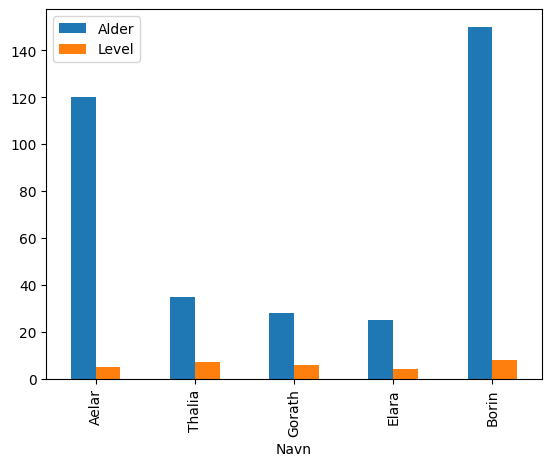

In [31]:
import matplotlib.pyplot as plt

df.plot(x="Navn", y=["Alder", "Level"], kind="bar")
plt.show()

##### Lagre filer

Når man har en dataframe, kan man enkelt lagre den som en `.csv` eller `.json`-fil.

```
df.to_csv("adventurers.csv", index=False)
df.to_json("adventurers.json", index=False)
```

#### CSV-filer

Filer med `.csv` er tekstfiler som følger en (litt slapp) standard.

- Hver linje (rad) representerer et dataobjekt, for eksempel et spill, en bil eller en person.
- Hver linje er delt opp i kolonner med et *delimiter*- eller *separator*-tegn, i dette tilfellet `,`.

```
Plassering,Spillnavn,Konsoll
1,"Mario Kart DS",DS
2,"Hey You, Pikachu!",N64
3,"WarioWare, Inc.: Mega MicroGame$",GBA
4,"Horse Life 4: My Horse, My Friend, My Champion",3DS
```

Filer med `.csv` har ofte en første rad (eller flere rader) som forklarer hva hver kolonne representerer. Dette kalles en *header*. I tillegg brukes det noen ganger en annen delimiter enn `,`, for eksempel `;` eller `\t`, til tross for at det heter *comma*-separated values.

In [33]:
import pandas as pd

df = pd.read_csv("spill_enkel.csv")

print(df)

   Plassering                                       Spillnavn Konsoll
0           1                                   Mario Kart DS      DS
1           2                               Hey You, Pikachu!     N64
2           3                WarioWare, Inc.: Mega MicroGame$     GBA
3           4  Horse Life 4: My Horse, My Friend, My Champion     3DS


````{admonition} Spesifisere separator og desimaltegn
:class: hint

Man kan spesifisere separator og desimaltegn som ekstra argumenter til `read_csv()`.

Dette er nyttig hvis vi har en datafil som bruker andre tegn for separator og komma.

```
2023;129,6;126,1;126,6;127,6;129,0;129,6;130,4;130,9;129,9;129,8;131,1;131,8;131,9
2022;122,8;117,8;119,1;119,8;121,2;121,5;122,6;124,2;123,9;125,6;126,0;125,8;125,9
2021;116,1;114,1;114,9;114,6;115,0;114,9;115,3;116,3;116,3;117,5;117,2;118,1;118,9
```
```
df = pd.read_csv("datafil.csv", sep=";", decimal=",")
```
````

#### JSON-filer

Filer med `.json` er tekstfiler som lagrer data på nesten samme måte som vi har gjort med [ordbøker (lenke)](ordbøker).

```
{
    "1" : {
        "Navn" : "Mario Kart DS",
        "Konsoll" : "DS"
    },
    "2" : {
        "Navn" : "Hey You, Pikachu!",
        "Konsoll" : "N64"
    },
    "3" : {
        "Navn" : "WarioWare, Inc.: Mega MicroGame$",
        "Konsoll" : "GBA"
    },
    "4" : {
        "Navn" : "Horse Life 4: My Horse, My Friend, My Champion",
        "Konsoll" : "3DS"
    }
}
```

In [49]:
import pandas as pd

df = pd.read_json("spill_enkel.json")

print(df)
print()
print(df[1]["Navn"]) # Henter navnet fra plassering 1

                     1                  2                                 3  \
Navn     Mario Kart DS  Hey You, Pikachu!  WarioWare, Inc.: Mega MicroGame$   
Konsoll             DS                N64                               GBA   

                                                      4  
Navn     Horse Life 4: My Horse, My Friend, My Champion  
Konsoll                                             3DS  

Mario Kart DS


````{admonition} Manglende data
:class: hint

Hvis man går gjennom en kolonne, kan man droppe de radene som ikke har data i den kolonnen ved å bruke `df.dropna()`-metoden.

```
Rating,Title,Console,Time(Optional)
5,Bloodborne,PS4,16h54m19s
4,Katamari Damacy,PS2,4h42m58s
3,Dead Cells,PC,
```
```
df = pd.read_csv("list.csv")
print(df["Time(Optional)"].dropna())
```
```
16h54m19s
4h42m58s
```
````

```{admonition} Dokumentasjonen
:class: note

Dokumentasjonen for `pandas` finner du [her (lenke)](https://pandas.pydata.org/docs/reference/frame.html).

Husk, å kunne lese dokumentasjon er en viktig ferdighet for en aspirerende programmerer! 🤓
```

---

#### Oppgaver

````{admonition} Oppgave 1 🅰️
:class: task

Lag din egen DataFrame. Første kolonne skal være `Fag` og andre kolonne skal være `Karakter`. Du kan finne på fag og karakterer.
- Finn snittkarakteren.
- Lag et søylediagram med labels som navnene på fagene og verdiene (høydene) som karakterene.
- Bruk `pandas` til å lagre dette som en datafil `karakterer.csv`.
````

`````{admonition} Oppgave 2 🎮
:class: task

Jeg har rundet hundrevis av spill og kategorisert de i en `.csv`-fil.

Last ned filen [her (lenke)](https://raw.githubusercontent.com/tobiasmelbo/om_meg/main/list.csv)

- Skriv ut antallet spill i listen.
- Skriv ut fordelingen mellom 1-ere, 2-ere, 3-ere, 4-ere og 5-ere.
- Skriv ut hvor mange spill det er til de $8$ mest populære spillkonsollene, i synkende rekkefølge.
- (BONUS) Regn ut summen av de registrerte tidene i timer.

````{admonition} Løsningsforslag
:class: solution, dropdown

```
import pandas as pd
from collections import Counter

# DataFrame
df = pd.read_csv("list.csv")

# Antall spill
print(f"-> Antall spill: {len(df)}")

# Fordeling av ratings
rating_counter = Counter()
for rating in df["Rating"]:
    rating_counter[rating] += 1
print(f"-> Ratings")
for n in range(1, 6):
    print(f"{n} : {rating_counter[n]}")

# Populære konsoller
print(f"-> Topp 8 konsoller")
console_counter = Counter()
for console in df["Console"]:
    console_counter[console] += 1
for x in console_counter.most_common(8):
    print(f"{x[0]:4} : {x[1]}")

# Total tid
print(f"-> Total tid:")
s = pd.to_timedelta(0)
for x in df["Time(Optional)"].dropna():
    s += pd.to_timedelta(x)
print(s)
```
```
-> Antall spill: 498
-> Ratings
1 : 41
2 : 91
3 : 200
4 : 134
5 : 32
-> Topp 8 konsoller
PC   : 366
PSX  : 18
PS3  : 15
X360 : 15
SNES : 12
GCN  : 12
N64  : 10
GBA  : 9
-> Total tid:
156 days 01:36:43
```
````
`````

`````{admonition} Oppgave 3 🏹
:class: task

Handelsmannen Knoteknut Glimretå er en handelsmann som selger utstyr til eventyrere.

Last ned filen {download}`gnome_merchant_inventory.json`.

Skriv ut en oversikt over de seks tingene han har mest av.
`````


`````{admonition} Oppgave 4 ✨
:class: task

Stjernestasjonen Epsilon-9 har et register over romskipene fra føderasjonen som har besøkt stasjonen.

Last ned filen {download}`starship_registry.csv`.

Skriv ut en fin tabell over alle besøkene i kronologisk rekkefølge.
`````

`````{admonition} Oppgave 5 🎬
:class: task

Norsk filmindustri har produsert noen sykt bra filmer gjennom tidene.

Last ned filen {download}`filmer.csv`.

- Lag en fin tabell. Brukeren skal kunne velge om man skal skrive ut i alfabetisk rekkefølge, eller etter utgivelse.
- Skriv ut de tre mest sette filmene på kino.
- Skriv ut de tre filmene med flest strømminger.
`````